In [1]:
!pip install numpy pandas matplotlib seaborn

In [4]:
# All imports and directory for csv.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
cars_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cars Datasets 2025.csv", encoding="cp1252")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# The 'Cars Prices' column needs to be cleaned and converted to numeric
# Remove currency symbols, commas, and handle ranges (take the lower value)
cars_df['Price_Numeric'] = cars_df['Cars Prices'].astype(str).str.replace('[$,]', '', regex=True).str.split('-').str[0]
cars_df['Price_Numeric'] = pd.to_numeric(cars_df['Price_Numeric'], errors='coerce')

# Sort by the numeric price and get the top 10
cheapest_cars = cars_df.sort_values(by='Price_Numeric').head(10)

display(cheapest_cars[['Company Names', 'Cars Names', 'Cars Prices']])

,Company Names,Cars Names,Cars Prices
635,Tata Motors,Nano GenX,"$4,000"
637,Tata Motors,Indica V2 Xeta,"$5,000"
636,Tata Motors,Indica eV2,"$6,200"
641,Tata Motors,Indigo eCS,"$6,500"
645,Tata Motors,Indigo LX,"$7,000"
646,Tata Motors,Indigo GLX,"$7,200"
1162,Mazda,Spiano,"$8,000 - $10,000"
1197,Mazda,Carol P360,"$8,000 - $10,000"
628,Tata Motors,Tiago,"$8,200"
643,Tata Motors,Indigo Marina,"$8,300"


In [11]:
# Sort by the numeric price in descending order and get the top 10
most_expensive_cars = cars_df.sort_values(by='Price_Numeric', ascending=False).head(10)

display(most_expensive_cars[['Company Names', 'Cars Names', 'Cars Prices']])

,Company Names,Cars Names,Cars Prices
887,Bugatti,La Voiture Noire,"$18,000,000"
886,Bugatti,Centodieci,"$9,000,000"
885,Bugatti,Divo,"$5,800,000"
1212,Mazda,787B (Race Car),"$5,000,000 - $7,000,000"
889,Bugatti,Mistral,"$5,000,000"
888,Bugatti,Bolide,"$4,500,000"
8,LAMBORGHINI,VENENO ROADSTER,"$4,500,000"
882,Bugatti,Chiron Super Sport,"$3,500,000"
883,Bugatti,Chiron Sport,"$3,300,000"
881,Bugatti,Chiron Pur Sport,"$3,300,000"


In [13]:
# Clean and convert 'HorsePower' to numeric
cars_df['HorsePower_Numeric'] = cars_df['HorsePower'].astype(str).str.replace('[hp,]', '', regex=True).str.split('-').str[0].str.split('/').str[0]
cars_df['HorsePower_Numeric'] = pd.to_numeric(cars_df['HorsePower_Numeric'], errors='coerce')

# Calculate dollars per horsepower ratio
# Add 1 to HorsePower_Numeric to avoid division by zero
cars_df['Dollars_Per_Horsepower'] = cars_df['Price_Numeric'] / (cars_df['HorsePower_Numeric'] + 1)

# Sort by the ratio in ascending order to get the best ratio (least dollars per horsepower)
best_value_cars = cars_df.sort_values(by='Dollars_Per_Horsepower').head(10)

display(best_value_cars[['Company Names', 'Cars Names', 'Cars Prices', 'HorsePower', 'Dollars_Per_Horsepower']])

,Company Names,Cars Names,Cars Prices,HorsePower,Dollars_Per_Horsepower
637,Tata Motors,Indica V2 Xeta,"$5,000",65 hp,75.757576
646,Tata Motors,Indigo GLX,"$7,200",85 hp,83.720930
667,Tesla,Cybertruck,"$69,900",800 hp,87.265918
636,Tata Motors,Indica eV2,"$6,200",70 hp,87.323944
1032,Ford,F-150 Lightning,"$40,000 - $90,000",452 hp,88.300221
199,TOYOTA,CAMRY,"$27,000",301 hp,89.403974
23,NISSAN,370Z,"$30,000",332 hp,90.090090
263,HYUNDAI,Veloster,"$25,000",275 hp,90.579710
641,Tata Motors,Indigo eCS,"$6,500",70 hp,91.549296
1030,Ford,Ranger,"$25,000 - $45,000",270 - 325 hp,92.250923


/tmp/ipython-input-1746142197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Numeric', y='Cars Names', data=cheapest_cars, palette='viridis')


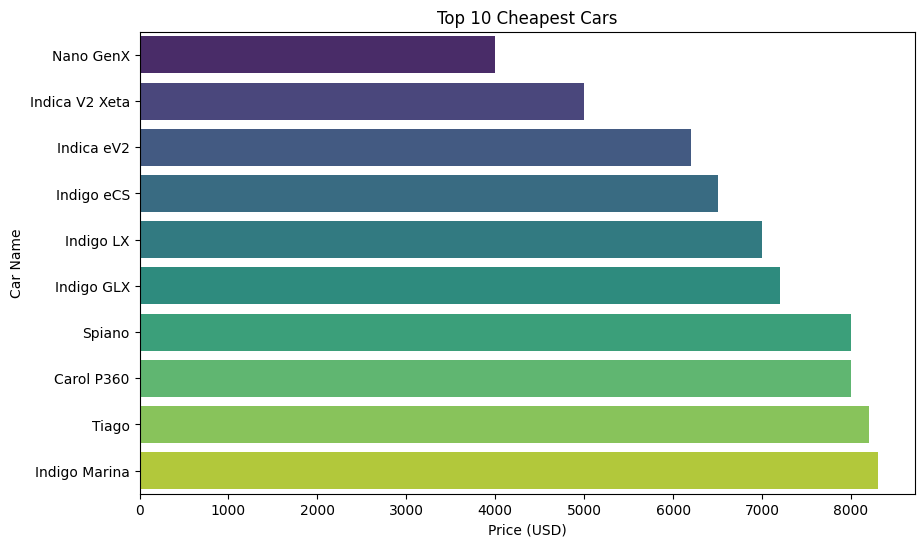

/tmp/ipython-input-1746142197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Numeric', y='Cars Names', data=most_expensive_cars, palette='magma')


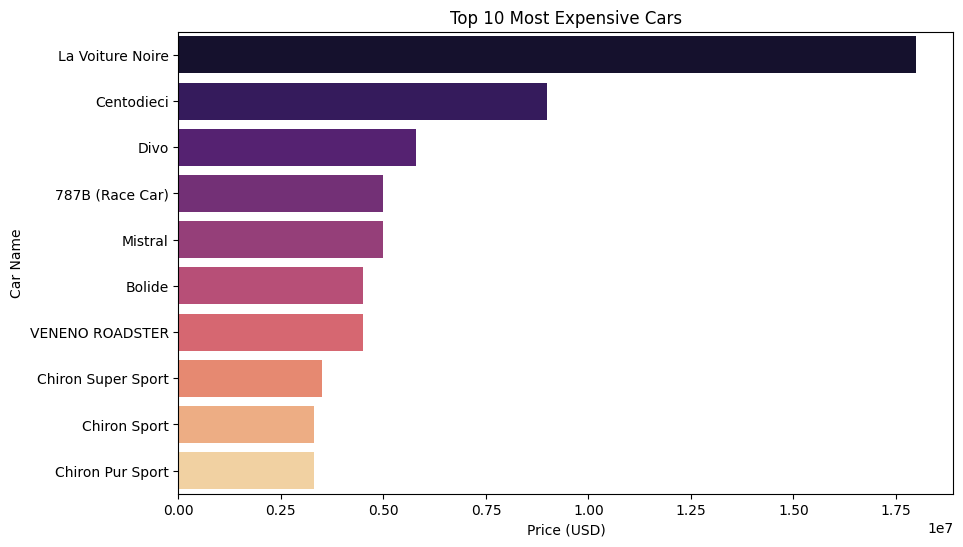

/tmp/ipython-input-1746142197.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dollars_Per_Horsepower', y='Cars Names', data=best_value_cars, palette='plasma')


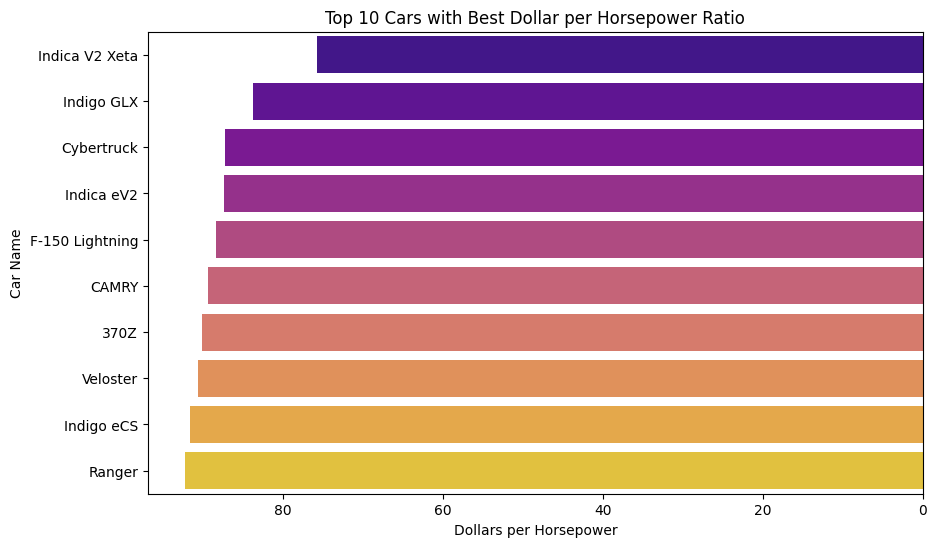

In [14]:
# Visualize the 10 cheapest cars
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_Numeric', y='Cars Names', data=cheapest_cars, palette='viridis')
plt.title('Top 10 Cheapest Cars')
plt.xlabel('Price (USD)')
plt.ylabel('Car Name')
plt.show()

# Visualize the 10 most expensive cars
plt.figure(figsize=(10, 6))
sns.barplot(x='Price_Numeric', y='Cars Names', data=most_expensive_cars, palette='magma')
plt.title('Top 10 Most Expensive Cars')
plt.xlabel('Price (USD)')
plt.ylabel('Car Name')
plt.show()

# Visualize the 10 cars with the best dollar per horsepower ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='Dollars_Per_Horsepower', y='Cars Names', data=best_value_cars, palette='plasma')
plt.title('Top 10 Cars with Best Dollar per Horsepower Ratio')
plt.xlabel('Dollars per Horsepower')
plt.ylabel('Car Name')
plt.gca().invert_xaxis() # Invert to show best ratio at the top
plt.show()